## <span style="color:#fc0388">Import Data</span>

The data is coming from the amazing job of [Jeff Sackmann](https://github.com/JeffSackmann). Thanks to him!

- ATP data: [available here](https://github.com/JeffSackmann/tennis_atp)  
- WTA data: [available here](https://github.com/JeffSackmann/tennis_wta)

In [1]:
import pandas as pd
import numpy as np
import pycountry as pycountry
import requests
import io

In [2]:
atp_players = pd.read_csv('data/atp_players.csv', sep=',')
atp_ranking = pd.read_csv('data/atp_ranking.csv', sep=',')
wta_players = pd.read_csv('data/wta_players.csv', sep=',')
wta_ranking = pd.read_csv('data/wta_ranking.csv', sep=',')

In [3]:
atp_players = atp_players.rename(columns={'ioc': 'country', 'name_first': 'firstname', 'name_last': 'lastname'})
atp_players = atp_players.drop(columns=['dob', 'wikidata_id'])

In [4]:
wta_players = wta_players.rename(columns={'ioc': 'country', 'name_first': 'firstname', 'name_last': 'lastname'})
wta_players = wta_players.drop(columns=['dob', 'wikidata_id'])

In [5]:
atp_ranking = atp_ranking.loc[atp_ranking['ranking_date'] == 20230626].loc[atp_ranking['rank'] < 251].rename(columns={'player': 'player_id'})

In [6]:
wta_ranking = wta_ranking.loc[wta_ranking['ranking_date'] == 20230626].loc[wta_ranking['rank'] < 251].rename(columns={'player': 'player_id'}).drop(columns=['tours'])

In [7]:
atp_players_rank = pd.merge(atp_ranking, atp_players, how="left", on="player_id")
wta_players_rank = pd.merge(wta_ranking, wta_players, how="left", on="player_id")

In [8]:
countries_men = atp_players_rank['country'].values.tolist()
list_countries_men = set()
for country in countries_men:
    list_countries_men.add(country)

In [9]:
countries_women = wta_players_rank['country'].values.tolist()
list_countries_women = set()
for country in countries_women:
    list_countries_women.add(country)

In [10]:
find_players_men_nation = atp_players_rank.loc[atp_players_rank['country'] == 'TPE']
find_players_men_nation

,ranking_date,rank,player_id,points,firstname,lastname,hand,country,height
194,20230626,195,200318,296,Yu Hsiou,Hsu,U,TPE,NaN
219,20230626,220,126555,262,Tung Lin,Wu,R,TPE,188.0


In [11]:
find_players_women_nation = wta_players_rank.loc[wta_players_rank['country'] == 'SLO']
find_players_women_nation

,ranking_date,rank,player_id,points,firstname,lastname,hand,country,height
143,20230626,144,214461,484,Tamara,Zidansek,R,SLO,168.0
239,20230626,240,203435,300,Dalila,Jakupovic,R,SLO,178.0
240,20230626,241,215219,299,Kaja,Juvan,R,SLO,170.0
245,20230626,246,220662,296,Veronika,Erjavec,R,SLO,NaN


Let's create functions that search for missing countries for WTA & ATP players, and assign them manually:

In [12]:
code_country_men = set()
new_countries_men = set()
missing_countries_code_men = set()

data = {'country': [], 'country_name': []}
countries_matching_table_men = pd.DataFrame(data)

for x in list_countries_men:
    country = pycountry.countries.get(alpha_3 = x)
    if country is not None:
        code_country_men.add(x)
        new_countries_men.add(country.name)
        countries_matching_table_men = countries_matching_table_men.append({'country': x, 'country_name': country.name}, ignore_index = True)
    else:
        missing_countries_code_men.add(x)

for code in missing_countries_code_men:
    if code == 'BUL':
        country_name = 'Bulgaria'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'CHI':
        country_name = 'Chile'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'CRO':
        country_name = 'Croatia'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'DEN':
        country_name = 'Denmark'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'GER':
        country_name = 'Germany'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'GRE':
        country_name = 'Greece'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'NED':
        country_name = 'Netherlands'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'POR':
        country_name = 'Portugal'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'SUI':
        country_name = 'Switzerland'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'TPE':
        country_name = 'Chinese Taipei'
        countries_matching_table_men = countries_matching_table_men.append({'country': code, 'country_name': country_name}, ignore_index=True)

In [13]:
code_country_women = set()
new_countries_women = set()
missing_countries_code_women = set()

data = {'country': [], 'country_name': []}
countries_matching_table_women = pd.DataFrame(data)

for x in list_countries_women:
    country = pycountry.countries.get(alpha_3 = x)
    if country is not None:
        code_country_women.add(x)
        new_countries_women.add(country.name)
        countries_matching_table_women = countries_matching_table_women.append({'country': x, 'country_name': country.name}, ignore_index = True)
    else:
        missing_countries_code_women.add(x)

for code in missing_countries_code_women:
    if code == 'BUL':
        country_name = 'Bulgaria'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'CRO':
        country_name = 'Croatia'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'DEN':
        country_name = 'Denmark'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'GER':
        country_name = 'Germany'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'GRE':
        country_name = 'Greece'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'NED':
        country_name = 'Netherlands'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'LAT':
        country_name = 'Latvia'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'SUI':
        country_name = 'Switzerland'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)
    if code == 'SLO':
        country_name = 'Slovenia'
        countries_matching_table_women = countries_matching_table_women.append({'country': code, 'country_name': country_name}, ignore_index=True)

In [14]:
atp_players_rank = pd.merge(atp_players_rank, countries_matching_table_men, how="left", on=["country"]).drop(columns=['country'])
atp_players_rank['fullname'] = atp_players_rank['firstname'] + ' ' + atp_players_rank['lastname']
atp_players_rank.head(20)

,ranking_date,rank,player_id,points,firstname,lastname,hand,height,country_name,fullname
0,20230626,1,207989,7675,Carlos,Alcaraz,R,185.0,Spain,Carlos Alcaraz
1,20230626,2,104925,7595,Novak,Djokovic,R,188.0,Serbia,Novak Djokovic
2,20230626,3,106421,5890,Daniil,Medvedev,R,198.0,Russian Federation,Daniil Medvedev
3,20230626,4,134770,4960,Casper,Ruud,R,183.0,Norway,Casper Ruud
4,20230626,5,126774,4670,Stefanos,Tsitsipas,R,193.0,Greece,Stefanos Tsitsipas
5,20230626,6,208029,4510,Holger,Rune,R,185.0,Denmark,Holger Rune
6,20230626,7,126094,4255,Andrey,Rublev,R,188.0,Russian Federation,Andrey Rublev
7,20230626,8,206173,3345,Jannik,Sinner,R,188.0,Italy,Jannik Sinner
8,20230626,9,126203,3310,Taylor,Fritz,R,193.0,United States,Taylor Fritz
9,20230626,10,126207,3085,Frances,Tiafoe,R,188.0,United States,Frances Tiafoe


In [15]:
wta_players_rank = pd.merge(wta_players_rank, countries_matching_table_women, how="left", on=["country"]).drop(columns=['country'])
wta_players_rank['fullname'] = wta_players_rank['firstname'] + ' ' + wta_players_rank['lastname']
wta_players_rank.head(20)

,ranking_date,rank,player_id,points,firstname,lastname,hand,height,country_name,fullname
0,20230626,1,216347,8940,Iga,Swiatek,R,176.0,Poland,Iga Swiatek
1,20230626,2,214544,8066,Aryna,Sabalenka,R,182.0,Belarus,Aryna Sabalenka
2,20230626,3,214981,5090,Elena,Rybakina,R,184.0,Kazakhstan,Elena Rybakina
3,20230626,4,202468,4905,Jessica,Pegula,R,170.0,United States,Jessica Pegula
4,20230626,5,201614,4845,Caroline,Garcia,R,177.0,France,Caroline Garcia
5,20230626,6,202460,3492,Ons,Jabeur,R,167.0,Tunisia,Ons Jabeur
6,20230626,7,221103,3305,Cori,Gauff,R,175.0,United States,Cori Gauff
7,20230626,8,206289,3301,Maria,Sakkari,R,172.0,Greece,Maria Sakkari
8,20230626,9,201520,3101,Petra,Kvitova,L,183.0,Czechia,Petra Kvitova
9,20230626,10,206252,2830,Barbora,Krejcikova,R,178.0,Czechia,Barbora Krejcikova


Let's make a function that search for the missing heights for WTA & ATP players:

In [16]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_height(fullname):
    search_query = fullname + " height"
    url = f"https://www.google.com/search?q={search_query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    height_element = soup.find("div", class_="Z0LcW t2b5Cf")
    if height_element:
        height_text = height_element.text

        numeric_part = re.search(r"([\d.,]+)", height_text)
        if numeric_part:
            height_numeric = numeric_part.group(1).replace(",", ".")
            height_cm = round(float(height_numeric) * 100, 0)

            return height_cm

    return None

for index, row in atp_players_rank.iterrows():
    if pd.isnull(row["height"]):
        fullname = row["fullname"]
        height = scrape_height(fullname)
        if height:
            atp_players_rank.at[index, "height"] = float(height)
            print(f"Height found for {fullname} and it's {height}")
        else:
            print(f"Height not found for {fullname}")
            
for index, row in wta_players_rank.iterrows():
    if pd.isnull(row["height"]):
        fullname = row["fullname"]
        height = scrape_height(fullname)
        if height:
            wta_players_rank.at[index, "height"] = float(height)
            print(f"Height found for {fullname} and it's {height}")
        else:
            print(f"Height not found for {fullname}")

Height found for Ben Shelton and it's 193.0
Height found for Luca Van Assche and it's 180.0
Height found for Alexander Shevchenko and it's 185.0
Height found for Rinky Hijikata and it's 178.0
Height found for Aleksandar Kovacevic and it's 183.0
Height found for Gabriel Diallo and it's 203.0
Height found for Filip Misolic and it's 180.0
Height found for Nicolas Moreno De Alboran and it's 185.0
Height found for Ivan Gakhov and it's 191.0
Height found for Francesco Passaro and it's 180.0
Height found for Francesco Maestrelli and it's 196.0
Height not found for Flavio Cobolli
Height found for Gijs Brouwer and it's 191.0
Height not found for Juncheng Shang
Height found for Mattia Bellucci and it's 178.0
Height found for Alexander Ritschard and it's 193.0
Height found for Sho Shimabukuro and it's 183.0
Height found for Jelle Sels and it's 188.0
Height found for Jan Choinski and it's 196.0
Height not found for Bu Yunchaokete
Height found for Camilo Ugo Carabelli and it's 185.0
Height found fo

### Hand

In [17]:
hand_all_atp = atp_players_rank.loc[:, ['rank', 'hand']].groupby("hand").size().sort_values(ascending=False)
hand_all_atp = pd.DataFrame(hand_all_atp, columns=['count'])
hand_all_atp['percentage'] = hand_all_atp['count'] / hand_all_atp['count'].sum() * 100
hand_all_atp

,count,percentage
hand,,
R,193,77.2
L,39,15.6
U,18,7.2


among the top 250 ATP-ranked players, 77,2% of the players are right-handed, 15,6% are left-handed and 7,2% of the players' prefered hand is unknown.

In [18]:
hand_all_wta = wta_players_rank.loc[:, ['rank', 'hand']].groupby("hand").size().sort_values(ascending=False)
hand_all_wta = pd.DataFrame(hand_all_wta, columns=['count'])
hand_all_wta['percentage'] = hand_all_wta['count'] / hand_all_wta['count'].sum() * 100
hand_all_wta

,count,percentage
hand,,
R,205,82.0
L,24,9.6
U,21,8.4


among the top 250 WTA-ranked players, 82% of the players are right-handed, 9,6% are left-handed and 8,4% of the players' prefered hand is unknown.

In [19]:
hand_top20_atp = atp_players_rank.loc[:, ['rank', 'hand']].loc[atp_players_rank['rank'] < 21].groupby("hand").size().sort_values(ascending=False)
hand_top20_atp = pd.DataFrame(hand_top20_atp, columns=['count'])
hand_top20_atp['percentage'] = hand_top20_atp['count'] / hand_top20_atp['count'].sum() * 100
hand_top20_atp

,count,percentage
hand,,
R,19,95.0
L,1,5.0


In [20]:
print('Only player left-handed in the top 20: {}'.format(atp_players_rank.loc[atp_players_rank['rank'] < 21].loc[atp_players_rank['hand'] == "L"]['fullname'].values[0]))

Only player left-handed in the top 20: Cameron Norrie


among the top 20 ATP-ranked players, only one player is left-handed, who is Cameron Norrie.

In [21]:
hand_top20_wta = wta_players_rank.loc[:, ['rank', 'hand']].loc[wta_players_rank['rank'] < 21].groupby("hand").size().sort_values(ascending=False)
hand_top20_wta = pd.DataFrame(hand_top20_wta, columns=['count'])
hand_top20_wta['percentage'] = hand_top20_wta['count'] / hand_top20_wta['count'].sum() * 100
hand_top20_wta

,count,percentage
hand,,
R,18,90.0
L,2,10.0


In [22]:
left_handed_players_wta = []

for index, row in wta_players_rank.loc[wta_players_rank['rank'] < 21].iterrows():
    if row['hand'] == "L":
        left_handed_players_wta.append(row['fullname'])

print('Left-handed players in the top 20:')
for player in left_handed_players_wta:
    print('-', player)


Left-handed players in the top 20:
- Petra Kvitova
- Beatriz Haddad Maia


among the top 20 WTA-ranked players, only two players are left-handed: Petra Kvitova and Beatriz Haddad Maia.

For information: the world's population is 90% right-handed and 10% left-handed.

### Height

In [23]:
height_all_atp = atp_players_rank.loc[:, ['rank', 'height', 'fullname']]
print('Average size: {}cm'.format(round(height_all_atp['height'].mean(), 2)))
tallest_player_index = height_all_atp['height'].idxmax()
tallest_player_name = height_all_atp.loc[tallest_player_index, 'fullname']
tallest_player_rank = height_all_atp.loc[tallest_player_index, 'rank']

smallest_player_index = height_all_atp['height'].idxmin()
smallest_player_name = height_all_atp.loc[smallest_player_index, 'fullname']
smallest_player_rank = height_all_atp.loc[smallest_player_index, 'rank']

print('Tallest player: {} ({}cm), ranked {}rd'.format(tallest_player_name, height_all_atp['height'].max(), tallest_player_rank))
print('Smallest player: {} ({}cm), ranked {}th'.format(smallest_player_name, height_all_atp['height'].min(), smallest_player_rank))

Average size: 185.59cm
Tallest player: John Isner (206.0cm), ranked 103rd
Smallest player: Yuta Shimizu (163.0cm), ranked 246th


Among the top 250 ATP-ranked players, the average height is approximatively 186cm.

In [24]:
height_all_wta = wta_players_rank.loc[:, ['rank', 'height', 'fullname']]
print('Average size: {}cm'.format(round(height_all_wta['height'].mean(), 2)))
tallest_player_index = height_all_wta['height'].idxmax()
tallest_player_name = height_all_wta.loc[tallest_player_index, 'fullname']
tallest_player_rank = height_all_wta.loc[tallest_player_index, 'rank']

smallest_player_index = height_all_wta['height'].idxmin()
smallest_player_name = height_all_wta.loc[smallest_player_index, 'fullname']
smallest_player_rank = height_all_wta.loc[smallest_player_index, 'rank']

print('Tallest player: {} ({}cm), ranked {}rd'.format(tallest_player_name, height_all_wta['height'].max(), tallest_player_rank))
print('Smallest player: {} ({}cm), ranked {}th'.format(smallest_player_name, height_all_wta['height'].min(), smallest_player_rank))

Average size: 173.38cm
Tallest player: Raluka Serban (188.0cm), ranked 173rd
Smallest player: Lauren Davis (157.0cm), ranked 44th


Among the top 250 WTA-ranked players, the average height is approximatively 173cm.

In [25]:
height_top20_atp = atp_players_rank.loc[:, ['rank', 'height', 'fullname']].loc[atp_players_rank['rank'] < 21]
print('Average size: {}cm'.format(round(height_top20_atp['height'].mean(), 2)))
tallest_player_index = height_top20_atp['height'].idxmax()
tallest_player_name = height_top20_atp.loc[tallest_player_index, 'fullname']
tallest_player_rank = height_top20_atp.loc[tallest_player_index, 'rank']

smallest_player_index = height_top20_atp['height'].idxmin()
smallest_player_name = height_top20_atp.loc[smallest_player_index, 'fullname']
smallest_player_rank = height_top20_atp.loc[smallest_player_index, 'rank']

print('Tallest player: {} ({}cm), ranked {}rd'.format(tallest_player_name, height_top20_atp['height'].max(), tallest_player_rank))
print('Smallest player: {} ({}cm), ranked {}th'.format(smallest_player_name, height_top20_atp['height'].min(), smallest_player_rank))

Average size: 188.9cm
Tallest player: Daniil Medvedev (198.0cm), ranked 3rd
Smallest player: Casper Ruud (183.0cm), ranked 4th


Among the top 20 ATP-ranked players, the average height is approximatively 189cm.

In [26]:
height_top20_wta = wta_players_rank.loc[:, ['rank', 'height', 'fullname']].loc[wta_players_rank['rank'] < 21]
print('Average size: {}cm'.format(round(height_top20_wta['height'].mean(), 2)))
tallest_player_index = height_top20_wta['height'].idxmax()
tallest_player_name = height_top20_wta.loc[tallest_player_index, 'fullname']
tallest_player_rank = height_top20_wta.loc[tallest_player_index, 'rank']

smallest_player_index = height_top20_wta['height'].idxmin()
smallest_player_name = height_top20_wta.loc[smallest_player_index, 'fullname']
smallest_player_rank = height_top20_wta.loc[smallest_player_index, 'rank']

print('Tallest player: {} ({}cm), ranked {}th'.format(tallest_player_name, height_top20_wta['height'].max(), tallest_player_rank))
print('Smallest player: {} ({}cm), ranked {}th'.format(smallest_player_name, height_top20_wta['height'].min(), smallest_player_rank))

Average size: 177.35cm
Tallest player: Beatriz Haddad Maia (185.0cm), ranked 13th
Smallest player: Ons Jabeur (167.0cm), ranked 6th


Among the top 20 WTA-ranked players, the average height is approximatively 177cm.

For information: The average height of a man can be estimated at around 180cm. For a woman, the average is around 165cm.

### Countries

In [27]:
countries_all_atp = atp_players_rank.loc[:, ['rank', 'country_name']].groupby("country_name").size().sort_values(ascending=False)
countries_all_atp = pd.DataFrame(countries_all_atp, columns=['count'])
countries_all_atp['percentage'] = countries_all_atp['count'] / countries_all_atp['count'].sum() * 100
countries_all_atp

,count,percentage
country_name,,
Italy,24,9.6
United States,23,9.2
France,23,9.2
Argentina,22,8.8
Australia,15,6.0
Spain,11,4.4
Russian Federation,10,4.0
Japan,8,3.2
Germany,7,2.8


The most represented countries among the top 250 ATP-ranked players is Italy with 24 players. USA and France are right next after, with each 23 players.

In [28]:
countries_all_wta = wta_players_rank.loc[:, ['rank', 'country_name']].groupby("country_name").size().sort_values(ascending=False)
countries_all_wta = pd.DataFrame(countries_all_wta, columns=['count'])
countries_all_wta['percentage'] = countries_all_wta['count'] / countries_all_wta['count'].sum() * 100
countries_all_wta

,count,percentage
country_name,,
United States,32,12.8
Russian Federation,25,10.0
Czechia,15,6.0
France,13,5.2
Spain,12,4.8
Germany,9,3.6
Australia,8,3.2
Romania,8,3.2
China,8,3.2


The most represented country among the top 250 WTA-ranked players is USA, with 32 players.

In [39]:
countries_top20_atp = atp_players_rank.loc[:, ['rank', 'country_name']].loc[atp_players_rank['rank'] < 21].groupby("country_name").size().sort_values(ascending=False)
countries_top20_atp = pd.DataFrame(countries_top20_atp, columns=['count'])
countries_top20_atp['percentage'] = countries_top20_atp['count'] / countries_top20_atp['count'].sum() * 100
countries_top20_atp['normalized count'] = countries_top20_atp['count'] / countries_all_atp['count']
countries_top20_atp.sort_values(ascending=False, by=["count", "normalized count"])

,count,percentage,normalized count
country_name,,,
Russian Federation,3,15.0,0.300000
United States,3,15.0,0.130435
Spain,2,10.0,0.181818
Italy,2,10.0,0.083333
Denmark,1,5.0,1.000000
Greece,1,5.0,1.000000
Norway,1,5.0,1.000000
Poland,1,5.0,0.500000
Croatia,1,5.0,0.333333


In [30]:
print('Only player from Denmark: {}'.format(atp_players_rank.loc[atp_players_rank['country_name'] == "Denmark"]['fullname'].values[0]))
print('Only player from Greece: {}'.format(atp_players_rank.loc[atp_players_rank['country_name'] == "Greece"]['fullname'].values[0]))
print('Only player from Norway: {}'.format(atp_players_rank.loc[atp_players_rank['country_name'] == "Norway"]['fullname'].values[0]))

Only player from Denmark: Holger Rune
Only player from Greece: Stefanos Tsitsipas
Only player from Norway: Casper Ruud


Even if France is one of the most represented country among the top 250 ATP-ranked players, there is no French player in the top 20 ATP-ranked players, unlike the USA and Italy, the others countries that are the most represented in the top 250, which have 3 and 2 players respectively in this top 20.  

With only 10 players from Russia in the top 250, 3 of them are in the top 20, which is the most represented country, with USA, in the top 20 ATP-ranked players.  

Three players are in the top 20, and they are the only ones from their respective countries in the top 250:  
- Casper Ruud from Norway
- Holger Rune from Denmark
- Stefanos Tsitsipas from Greece

They are very likely to be highly appreciated and supported in their own countries!

In [40]:
countries_top20_wta = wta_players_rank.loc[:, ['rank', 'country_name']].loc[wta_players_rank['rank'] < 21].groupby("country_name").size().sort_values(ascending=False)
countries_top20_wta = pd.DataFrame(countries_top20_wta, columns=['count'])
countries_top20_wta['percentage'] = countries_top20_wta['count'] / countries_top20_wta['count'].sum() * 100
countries_top20_wta['normalized count'] = countries_top20_wta['count'] / countries_all_wta['count']
countries_top20_wta.sort_values(ascending=False, by=["count", "normalized count"])

,count,percentage,normalized count
country_name,,,
Czechia,4,20.0,0.266667
Russian Federation,3,15.0,0.120000
Belarus,2,10.0,0.400000
United States,2,10.0,0.062500
Tunisia,1,5.0,1.000000
Kazakhstan,1,5.0,0.500000
Latvia,1,5.0,0.500000
Brazil,1,5.0,0.333333
Greece,1,5.0,0.333333


USA is maybe the most represented country in the top 250 WTA-ranked players, but there are only 2 players in top 20 WTA-ranked players.  

France is the 4th most represented country in the top 250 WTA-ranked players, with 13 players. Unfortunately, only one player is in the top 20, and that's Caroline Garcia.

The most represented country in the top 20 WTA-ranked players is Czechia, with 4 players. Czechia is the 3rd most represented country in the top 250.

With 25 players from Russia in the top 250, 3 of them are in the top 20, which is the second most represented country, in the top 20 WTA-ranked players.  

Only one player in the top 20 is her country's sole representative in the top 250:  
- Ons Jabeur from Tunisia

She is a real superstar in her country and all around the world: as the only representative of an african country in the top 20, she inspires an entire continent, showing that anyone can achieve their dreams.

In [32]:
countries_all_all = pd.concat([countries_all_atp, countries_all_wta]).groupby('country_name')['count'].sum()
countries_all_all = pd.DataFrame({'country_name': countries_all_all.index, 'count': countries_all_all.values})
countries_all_all['percentage'] = countries_all_all['count'] / countries_all_all['count'].sum() * 100
countries_all_all = countries_all_all.sort_values('count', ascending=False).reset_index(drop=True)
countries_all_all

,country_name,count,percentage
0,United States,55,11.0
1,France,36,7.2
2,Russian Federation,35,7.0
3,Italy,32,6.4
4,Argentina,26,5.2
5,Spain,23,4.6
6,Australia,23,4.6
7,Czechia,20,4.0
8,Germany,16,3.2
9,Japan,14,2.8


Among the top 250 ATP & WTA-ranked players combined, USA is the most represented country with 55 players.

In [41]:
countries_top20_all = pd.concat([countries_top20_atp, countries_top20_wta]).groupby('country_name')['count'].sum()
countries_top20_all = pd.DataFrame({'country_name': countries_top20_all.index, 'count': countries_top20_all.values})
countries_top20_all['percentage'] = countries_top20_all['count'] / countries_top20_all['count'].sum() * 100
countries_top20_all['normalized count'] = countries_top20_all['count'] / countries_all_all['count']
countries_top20_all.sort_values(ascending=False, by=["count", "normalized count"]).reset_index(drop=True)

,country_name,count,percentage,normalized count
0,Russian Federation,6,15.0,0.600000
1,United States,5,12.5,0.625000
2,Czechia,4,10.0,0.173913
3,Spain,2,5.0,0.222222
4,Poland,2,5.0,0.181818
5,Italy,2,5.0,0.153846
6,Greece,2,5.0,0.142857
7,Croatia,2,5.0,0.086957
8,Belarus,2,5.0,0.057143
9,United Kingdom,1,2.5,0.125000


As we can see, Russia is the most represented country in the top 20 ATP & WTA-ranked players combined, with 6 players out of 40. It's the third most represented country in the top 250 ATP & WTA-ranked players combined.  

The second most represented country in the top 20 combined is USA, with 5 players, and which is the first most represented in the top 250 combined.  

Surprisingly, as the second most represented country in the top 250 combined, France as only one player in the top 20 combined rankings... In comparison, it's the same amount as Norway, which as only one player in the top 250 combined rankings.

In [34]:
country_continent = {
    'United States': 'North America',
    'France': 'Europe',
    'Russian Federation': 'Europe',
    'Italy': 'Europe',
    'Argentina': 'Latin America',
    'Australia': 'Oceania',
    'Spain': 'Europe',
    'Czechia': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Switzerland': 'Europe',
    'Belgium': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Ukraine': 'Europe',
    'Romania': 'Europe',
    'Croatia': 'Europe',
    'Hungary': 'Europe',
    'Serbia': 'Europe',
    'Netherlands': 'Europe',
    'Austria': 'Europe',
    'Slovakia': 'Europe',
    'Brazil': 'Latin America',
    'Belarus': 'Europe',
    'Poland': 'Europe',
    'Bulgaria': 'Europe',
    'Korea, Republic of': 'Asia',
    'Colombia': 'Latin America',
    'Turkey': 'Asia',
    'Slovenia': 'Europe',
    'Greece': 'Europe',
    'Sweden': 'Europe',
    'Kazakhstan': 'Asia',
    'Chile': 'Latin America',
    'Estonia': 'Europe',
    'India': 'Asia',
    'Latvia': 'Europe',
    'Denmark': 'Europe',
    'Mexico': 'Latin America',
    'Moldova, Republic of': 'Europe',
    'Tunisia': 'Africa',
    'Bosnia and Herzegovina': 'Europe',
    'Chinese Taipei': 'Asia',
    'Portugal': 'Europe',
    'Finland': 'Europe',
    'Andorra': 'Europe',
    'Peru': 'Latin America',
    'Norway': 'Europe',
    'North Macedonia': 'Europe',
    'Montenegro': 'Europe',
    'Lithuania': 'Europe',
    'Jordan': 'Asia',
    'Egypt': 'Africa',
    'Ecuador': 'Latin America',
    'Dominican Republic': 'Latin America',
    'Cyprus': 'Europe',
    'Bolivia, Plurinational State of': 'Latin America',
    'Uzbekistan': 'Asia'
}

countries_all_all['continent'] = countries_all_all['country_name'].map(country_continent)
countries_all_all_continent = countries_all_all.groupby('continent')['count'].sum().reset_index().sort_values('count', ascending=False)
countries_all_all_continent

,continent,count
2,Europe,316
4,North America,66
3,Latin America,47
1,Asia,45
5,Oceania,23
0,Africa,3


In [35]:
countries_top20_all['continent'] = countries_top20_all['country_name'].map(country_continent)
countries_top20_all_continent = countries_top20_all.groupby('continent')['count'].sum().reset_index().sort_values('count', ascending=False)
countries_top20_all_continent

,continent,count
2,Europe,29
4,North America,6
3,Latin America,2
0,Africa,1
1,Asia,1
5,Oceania,1


In [36]:
countries_amount_by_continent = countries_all_all.groupby('continent').size().sort_values(ascending=False)
countries_amount_by_continent

continent
Europe           36
Asia              9
Latin America     9
Africa            2
North America     2
Oceania           1
dtype: int64

It's normal to find that most of the players from top 250 and top 20 of ATP & WTA combined are from Europe, because it's the most represented continent, with 36 countries in the top 250.  
However, we can see that North America has the second most players in the top 20 and top 250, but it's the 2nd least represented continent with only 2 countries.

With Looker Studio, we can see the heatmap of the players' countries in the top 250 of the combined ATP & WTA rankings:

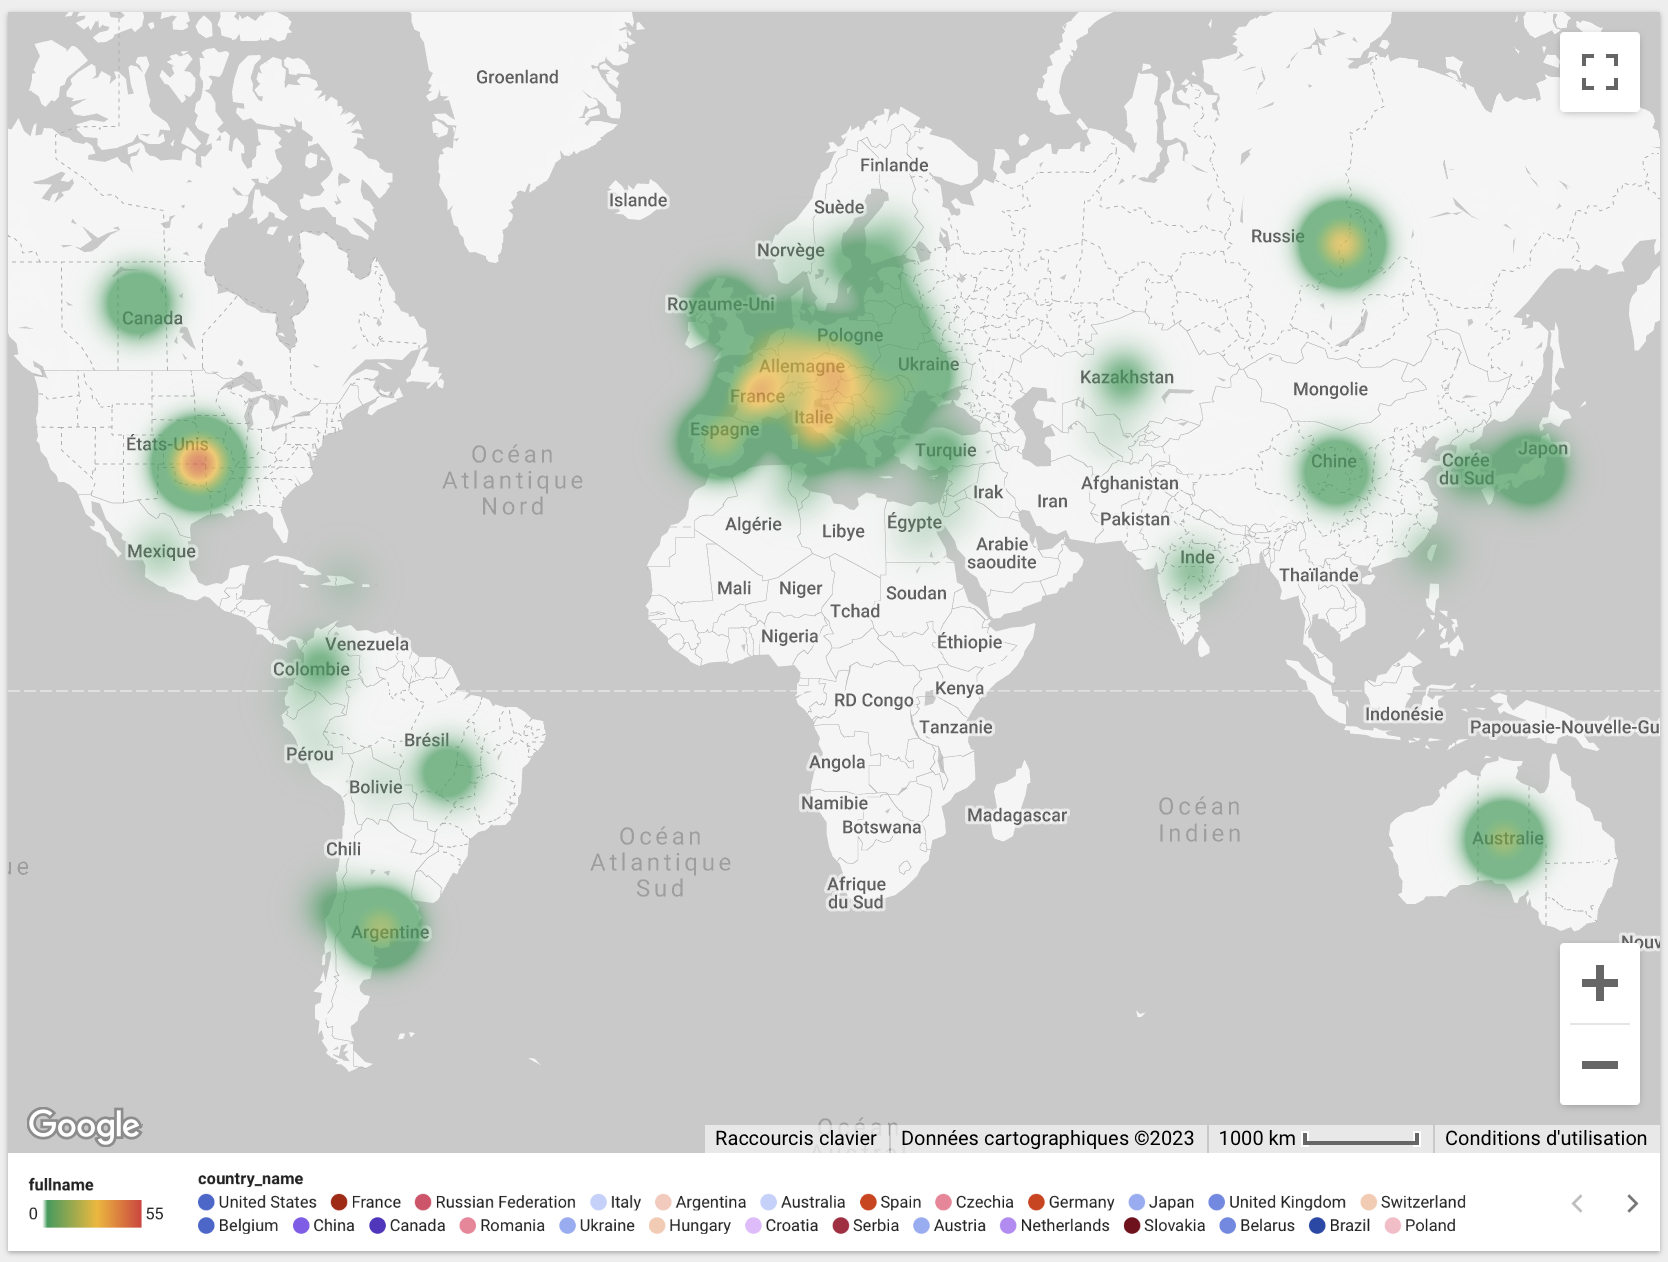

### Popularity

Focus on the 3rd most represented countries in the top 250:

- France  
According to [Statista](https://fr.statista.com/infographie/28155/sports-les-plus-suivis-en-france-popularite/#:~:text=Sports%20professionnels&text=Le%20ballon%20rond%20trône%20largement,popularité%20au%20Tour%20de%20France.), Tennis is the second most popular sport in France behind Football in 2023.   
- USA  
According to [Statista](https://www.statista.com/chart/28107/sports-followed-by-americans/), Tennis isn't that popular anymore since 2022, especially with the retirement of Serena Williams. In fact, Tennis is behind American Football, Basketball, Baseball, Boxing, Hockey, Football, Golf or even MMA. It's only the 9th most popular sport.  
In 2019, the United States Tennis Association (USTA) announced a five-year, $20 million investment to support the development of young players.
- Russia  
According to [Statista](https://www.statista.com/statistics/1058657/interst-in-sports-in-russia-by-type/), Tennis was the 8th most popular sport in Russia in 2018. Football, Hockey, Biathlon or even Volleyball is more popular than Tennis in Russia.

In [37]:
atp_players_rank.to_csv('data/atp_top250_players_rank.csv', index=False)
wta_players_rank.to_csv('data/wta_top250_players_rank.csv', index=False)